In [1]:
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
# Loading data
file_path = Path("Resources/Crimes_-_2001_to_Present.csv")
df = pd.read_csv(file_path)
df = df.set_index("ID")
print(df.shape)
df.head()

(7468714, 21)


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
df.dtypes

Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
df[df_cat].nunique()

Case Number             7468223
Date                    3059386
Block                     61929
IUCR                        403
Primary Type                 36
Description                 539
Location Description        214
FBI Code                     26
Updated On                 4632
Location                 881778
dtype: int64

In [5]:
df['Primary Type'].value_counts()

THEFT                                1571737
BATTERY                              1370088
CRIMINAL DAMAGE                       851791
NARCOTICS                             740160
ASSAULT                               480350
OTHER OFFENSE                         464244
BURGLARY                              414658
MOTOR VEHICLE THEFT                   345157
DECEPTIVE PRACTICE                    321950
ROBBERY                               280780
CRIMINAL TRESPASS                     208644
WEAPONS VIOLATION                      95152
PROSTITUTION                           69467
OFFENSE INVOLVING CHILDREN             52739
PUBLIC PEACE VIOLATION                 51373
SEX OFFENSE                            28919
CRIM SEXUAL ASSAULT                    27813
INTERFERENCE WITH PUBLIC OFFICER       17814
LIQUOR LAW VIOLATION                   14643
GAMBLING                               14607
ARSON                                  12693
HOMICIDE                               11667
KIDNAPPING

In [6]:
yr_df=df[(df.Year>2020)]
yr_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
12260346,JE102126,01/03/2021 01:23:00 PM,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732,...,6.0,68.0,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)"
12263464,JE105797,01/03/2021 06:59:00 AM,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,623,...,17.0,44.0,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)"
12259990,JE101773,01/03/2021 12:20:00 AM,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1513,...,29.0,25.0,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)"
12260669,JE102509,01/03/2021 08:47:00 PM,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,713,...,16.0,67.0,18,1169298.0,1866822.0,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)"
25702,JE102438,01/03/2021 08:09:00 PM,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,332,...,5.0,43.0,01A,1188038.0,1860051.0,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)"


In [7]:
print(yr_df.shape)

(206083, 21)


In [8]:
yr_df['Primary Type'].value_counts()

BATTERY                              40630
THEFT                                40506
CRIMINAL DAMAGE                      25234
ASSAULT                              20395
DECEPTIVE PRACTICE                   15992
OTHER OFFENSE                        13786
MOTOR VEHICLE THEFT                  10636
WEAPONS VIOLATION                     8997
ROBBERY                               7994
BURGLARY                              6672
NARCOTICS                             4106
CRIMINAL TRESPASS                     3410
OFFENSE INVOLVING CHILDREN            1864
CRIMINAL SEXUAL ASSAULT               1456
SEX OFFENSE                           1041
HOMICIDE                               812
PUBLIC PEACE VIOLATION                 601
ARSON                                  523
STALKING                               362
INTERFERENCE WITH PUBLIC OFFICER       315
LIQUOR LAW VIOLATION                   184
CONCEALED CARRY LICENSE VIOLATION      174
INTIMIDATION                           119
KIDNAPPING 

In [9]:
yr_df.Date = yr_df.Date.apply(pd.to_datetime)
yr_df.assign(Date=yr_df.Date.dt.date, Time=yr_df.Date.dt.time)



C:\Users\kyobu\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time
ID,,,,,,,,,,,,,,,,,,,,,
12260346,JE102126,2021-01-03,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732,...,68.0,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)",13:23:00
12263464,JE105797,2021-01-03,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,623,...,44.0,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)",06:59:00
12259990,JE101773,2021-01-03,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1513,...,25.0,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)",00:20:00
12260669,JE102509,2021-01-03,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,713,...,67.0,18,1169298.0,1866822.0,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)",20:47:00
25702,JE102438,2021-01-03,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,332,...,43.0,01A,1188038.0,1860051.0,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)",20:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584016,JF102657,2022-01-03,026XX W POTOMAC AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,True,False,1423,...,24.0,15,1158481.0,1908544.0,2022,01/10/2022 03:51:23 PM,41.904786,-87.693292,"(41.904786279, -87.69329161)",23:06:00
12586745,JF106057,2022-01-02,018XX S MILLARD AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,1014,...,29.0,06,1152336.0,1890656.0,2022,01/10/2022 03:48:58 PM,41.855823,-87.716337,"(41.855823304, -87.716336514)",21:00:00
12586896,JF105534,2022-01-03,016XX N HOYNE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER (SPECIFY),False,False,1434,...,24.0,14,1162085.0,1910717.0,2022,01/10/2022 03:51:23 PM,41.910675,-87.679992,"(41.910674599, -87.679992255)",03:02:00


In [10]:
prep_df=pd.DataFrame(yr_df.assign(Date=yr_df.Date.dt.date, Time=yr_df.Date.dt.time))
prep_df.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time
ID,,,,,,,,,,,,,,,,,,,,,
12260346,JE102126,2021-01-03,070XX S EGGLESTON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,732,...,68.0,08B,1174496.0,1858251.0,2021,01/16/2021 03:49:23 PM,41.766435,-87.635964,"(41.766435144, -87.635963997)",13:23:00
12263464,JE105797,2021-01-03,080XX S YALE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,623,...,44.0,06,1176011.0,1851718.0,2021,01/16/2021 03:49:23 PM,41.748474,-87.630607,"(41.748473982, -87.630606588)",06:59:00
12259990,JE101773,2021-01-03,056XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1513,...,25.0,08B,1138722.0,1900183.0,2021,01/16/2021 03:49:23 PM,41.882224,-87.766076,"(41.88222427, -87.766076162)",00:20:00
12260669,JE102509,2021-01-03,057XX S RACINE AVE,2022,NARCOTICS,POSSESS - COCAINE,STREET,True,False,713,...,67.0,18,1169298.0,1866822.0,2021,01/16/2021 03:49:23 PM,41.790069,-87.654769,"(41.79006908, -87.654768679)",20:47:00
25702,JE102438,2021-01-03,068XX S STONY ISLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,332,...,43.0,01A,1188038.0,1860051.0,2021,01/10/2021 03:51:53 PM,41.771062,-87.586271,"(41.771062488, -87.586270811)",20:09:00


In [11]:
prep_df=prep_df.drop(columns=['Case Number','Block', 'Description', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On' ])
print(prep_df.shape)
prep_df.head()

(206083, 13)


,Case Number,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Location,Time
ID,,,,,,,,,,,,,
12260346,JE102126,2021-01-03,0486,BATTERY,APARTMENT,False,True,7.0,2021,41.766435,-87.635964,"(41.766435144, -87.635963997)",13:23:00
12263464,JE105797,2021-01-03,0820,THEFT,RESIDENCE,False,False,6.0,2021,41.748474,-87.630607,"(41.748473982, -87.630606588)",06:59:00
12259990,JE101773,2021-01-03,0486,BATTERY,APARTMENT,False,True,15.0,2021,41.882224,-87.766076,"(41.88222427, -87.766076162)",00:20:00
12260669,JE102509,2021-01-03,2022,NARCOTICS,STREET,True,False,7.0,2021,41.790069,-87.654769,"(41.79006908, -87.654768679)",20:47:00
25702,JE102438,2021-01-03,0110,HOMICIDE,STREET,False,False,3.0,2021,41.771062,-87.586271,"(41.771062488, -87.586270811)",20:09:00


In [15]:
df = prep_df[['Date','Primary Type']]

In [17]:
import numpy as np

In [24]:
Chicago_Weather_df = pd.DataFrame({'Temp':np.random.uniform(-10,70,206083),'Date':df.Date}).set_index('Date').reset_index()

In [26]:
df = df.set_index('Date').reset_index()

In [53]:
merged_df = df.merge(Chicago_Weather_df,on='Date').drop(columns='Date')

In [54]:
merged_df.head()

,Primary Type,Temp
0,BATTERY,66.411586
1,BATTERY,15.214365
2,BATTERY,66.794746
3,BATTERY,36.231223
4,BATTERY,12.043452


In [55]:
y = merged_df['Primary Type']
X = merged_df[['Temp']]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

<AxesSubplot:xlabel='Temp', ylabel='Primary Type'>

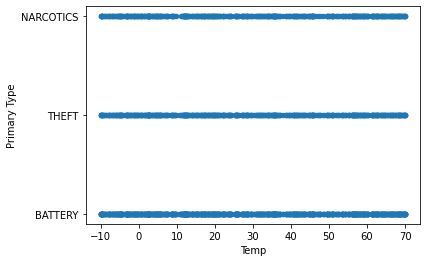

In [61]:
merged_df[:2000].plot.scatter('Temp','Primary Type')